## Import Packages

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%run /content/drive/MyDrive/churn/Packages.ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 315 kB 13.3 MB/s 
     |████████████████████████████████| 690 kB 66.4 MB/s 
     |████████████████████████████████| 102 kB 72.0 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 9.9 MB 59.0 MB/s 
     |████████████████████████████████| 4.7 MB 53.3 MB/s 
     |████████████████████████████████| 296 kB 47.5 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=a63679b2f9c5beaa40e2de219388cc6f5a07c3650d58a5d52380433bae69297b
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
Successfully built htmlmin
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2
  Attempting uninstall: requests
  

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:114: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning,


## Reading dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/churn/telco_churn.csv')
df = df.drop('Unnamed: 0', axis =1)
df.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [ ]:
x = df.drop('Churn', axis =1)
x.dtypes

SeniorCitizen                                int64
MonthlyCharges                             float64
TotalCharges                                 int64
gender_Female                                int64
gender_Male                                  int64
Partner_No                                   int64
Partner_Yes                                  int64
Dependents_No                                int64
Dependents_Yes                               int64
PhoneService_No                              int64
PhoneService_Yes                             int64
MultipleLines_No                             int64
MultipleLines_No phone service               int64
MultipleLines_Yes                            int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No                           int64
OnlineSecurity_No                            int64
OnlineSecurity_No internet service           int64
OnlineSecurity_Yes             

In [ ]:
y = df['Churn']
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

## Train Test Split 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Decision Tree Classifier

### Standard model

What could we expect from this model ? If we want to maximize the precision of the model, we should optimize the number of tree branches, that means not specify the 'max_depth' parameter. If we want to maximize recall, we do not need to go as deeper in the tree as we should do for a precision maximization.
That means, lets try with max_depth = 3 for ploting a simple tree. 

In [22]:
model_dt = DecisionTreeClassifier(criterion = 'gini', random_state= 100, max_depth=3, min_samples_leaf=8)

In [23]:
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=8, random_state=100)

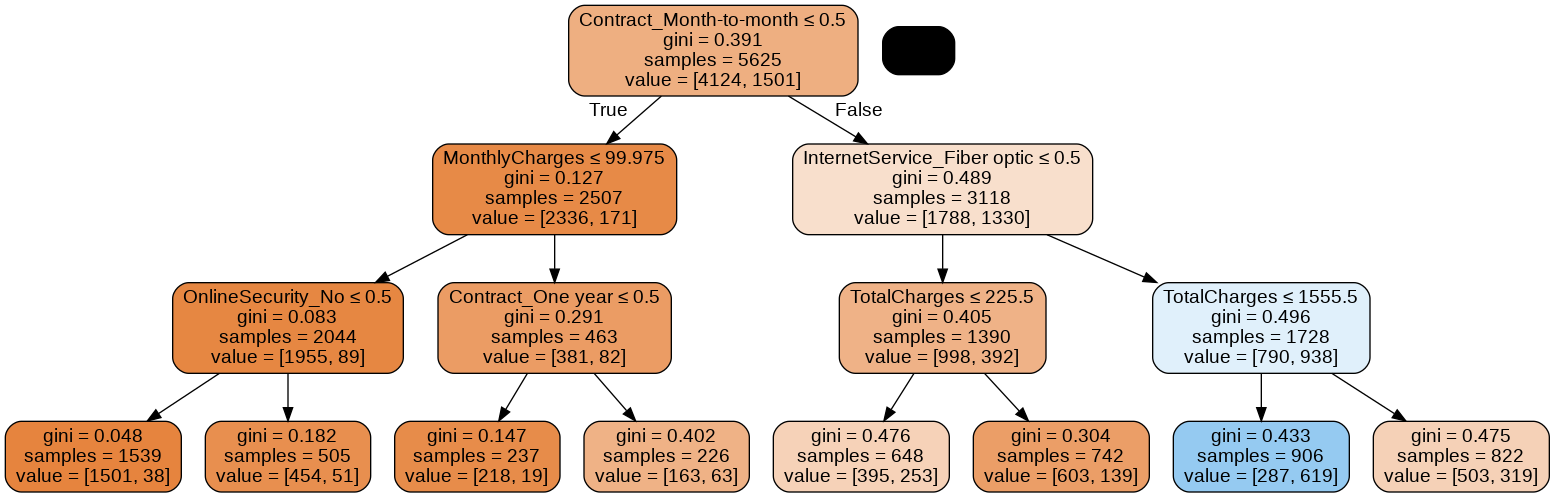

In [24]:
from six import StringIO
from IPython.display import Image
from pydot import graph_from_dot_data
feature_cols = x.columns
dot_data = StringIO()
export_graphviz(model_dt, out_file = dot_data,
                filled=True,rounded=True,
                special_characters=True, feature_names=feature_cols)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Reading : **Root** and **decision nodes** (the higher stairs) contain questions which split into **subnodes**. The **leaf nodes** (the lowest one) are nodes that don't split into more nodes but are the ones where classes are assigned by majority vote. 
We read this Tree from the root node to the leaf node. 


---


Starting at the root node, we first ask "Is the contrat is Month-by-month"? (Since the variable is 0 or 1, 0.5 make the threshold). 
If it's true, so we're step down to the value of Monthly Charges, True at right and False at left. 
Value is a vector that indicates the well classify raws (first element) and the wrong one (second coordinate) 


---


Without max_depth, classification trees are a greedy algorithm which means by default it will continue to split until it has a **pure node**. Without max_depth, this often leads to overfitting on the training dataset. 

Decision trees split on the feature and correspondning split point that results in the largest **information gain** (IG) for a given criterion (here, gini).
IG = Information before splitting - information after splitting.  

If we look at the upper two stages, we have :

In [28]:
# Gini for parent
print(1 - ((4124/(4124+1501))**2+(1501/(4124+1501))**2))
# Gini for child node (left)
print(1 - ((2336/(2336+171))**2+(171/(2336+171))**2))
# Gini for child node (right)
print(1 - ((1788/(1788+1330))**2+(1330/(1788+1330))**2))
# Information gain 
print(0.391- 0.127*(2507/5625)-0.489*(3118/5625))

0.3912769738271604
0.1271130901286528
0.48921180622271887
0.06333937777777776


In [29]:
feat_importance = model_dt.tree_.compute_feature_importances(normalize=False)
feat_imp_dict = dict(zip(feature_cols, model_dt.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict,orient='index')
feat_imp.rename(columns={0:'FeatureImportance'},inplace=True)
feat_imp.sort_values(by=['FeatureImportance'],ascending=False).head(8)

,FeatureImportance
Contract_Month-to-month,0.602521
InternetService_Fiber optic,0.176924
TotalCharges,0.174938
MonthlyCharges,0.022738
Contract_One year,0.015405
OnlineSecurity_No,0.007474
SeniorCitizen,0.000000
Contract_Two year,0.000000


As we can see, with max_depth = 3, only 6 variables have a significant importance inside the model. 

We finally look at the metrics of interest, here they are precision (for qualitative need) and recall (for a quantitative need).

In [34]:
y_pred = model_dt.predict(x_test)
report = metrics.classification_report(y_test, y_pred, output_dict=True)
precision = report['macro avg']['precision']
recall = report['macro avg']['recall']
print('precision : {}'.format(precision))
print('recall : {}'.format(recall))

precision : 0.7309398103260211
recall : 0.6594747771686823


In [36]:
print(metrics.confusion_matrix(y_test,y_pred))

[[961  78]
 [223 145]]


min_samples_leaf and max_depth are parameters used to prevent a tree from overfiting. Cost complexity pruning (ccp) provides another option to control the size of a tree. What why ccp will be used next. 

### Tune the Depth of a Tree

In [41]:
max_depth_range = list(range(1,10))
precisions = []
recalls = []
for depth in max_depth_range:
  clf = DecisionTreeClassifier(max_depth=depth, random_state=100)
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  report = metrics.classification_report(y_test, y_pred, output_dict=True)
  precision = report['macro avg']['precision']
  recall = report['macro avg']['recall']
  precisions.append(precision)
  recalls.append(recall)
print(precisions)
print(recalls)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.369225302061123, 0.7085004965243298, 0.7309398103260211, 0.738610563842762, 0.7338719661283434, 0.7243103203999433, 0.7210969497267633, 0.7118891309553709, 0.7002966647688111]
[0.5, 0.7196510022178516, 0.6594747771686823, 0.6995556450600494, 0.6976307172448425, 0.6739104280872076, 0.6993568753400008, 0.6897610055655521, 0.6748153533916391]


The precision looks to be at its peak for max_depth = 4. And it's for max_depth = 2 that the recall is at its peak. 

### Cost Complexity pruning
[Pruning technique](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py) is parameterized by the cost complexity parameter, ccp_alpha. Greater values of ccp_alpha increase the number of nodes pruned.
We are looking for a precision optimization model.

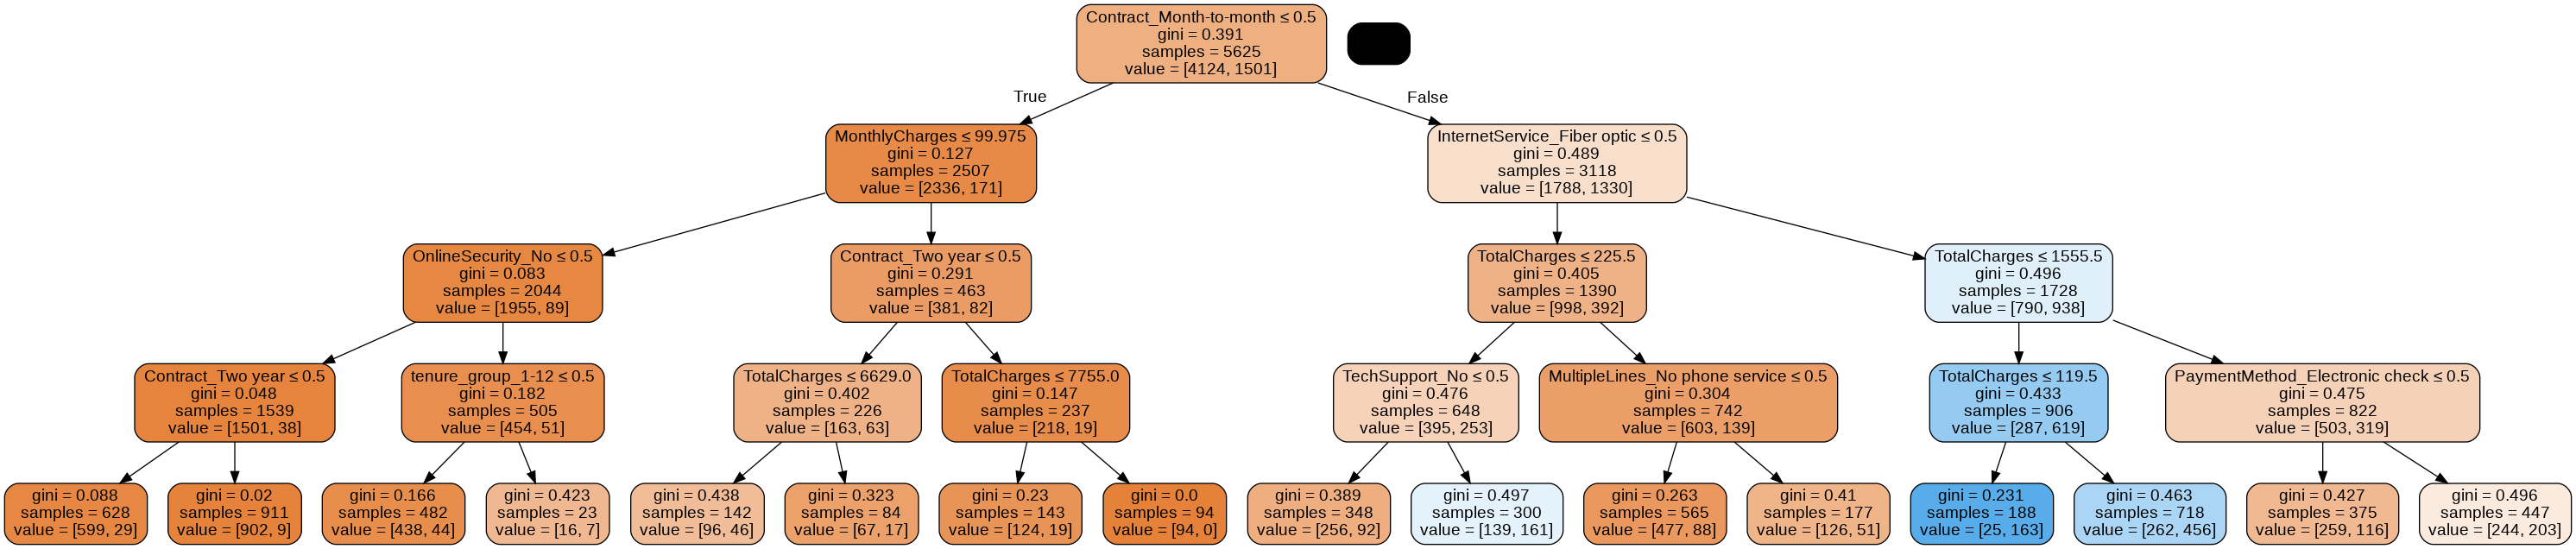

In [42]:
from six import StringIO
from IPython.display import Image
model_prune = DecisionTreeClassifier(criterion = 'gini', random_state= 100,max_depth =4)
model_prune.fit(x_train, y_train)
feature_cols = x.columns
dot_data = StringIO()
export_graphviz(model_prune, out_file = dot_data,
                filled=True,rounded=True,
                special_characters=True, feature_names=feature_cols)
from pydot import graph_from_dot_data
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [45]:
feat_importance = model_prune.tree_.compute_feature_importances(normalize=False)
feat_imp_dict = dict(zip(feature_cols, model_prune.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict,orient='index')
feat_imp.rename(columns={0:'FeatureImportance'},inplace=True)
feat_imp.sort_values(by=['FeatureImportance'],ascending=False).head(12)

,FeatureImportance
Contract_Month-to-month,0.547329
TotalCharges,0.188957
InternetService_Fiber optic,0.160718
TechSupport_No,0.036640
MonthlyCharges,0.020655
Contract_Two year,0.015496
PaymentMethod_Electronic check,0.013115
MultipleLines_No phone service,0.007245
OnlineSecurity_No,0.006789
tenure_group_1-12,0.003057


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

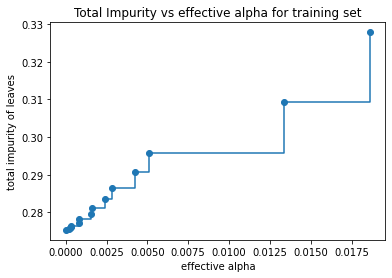

In [46]:
path = model_prune.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

Minimal ccp finds the node with the "weakest link". The weakest link is characterized by an effective akpha, where the nodes with the smallest effective alpha, where the nodes with the smallest effective alpha are pruned first. to get an idea of what values of ccp_alpha could be appropriate, sklearn provides the above function that returns the effective alphas and the corresponding total leaf impurities at each step of pruning process. As alpha increases, more of the tree is pruned, which increases the total impurities at each step of the pruning process. As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves. 

In [48]:
clfs = []
for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(random_state= 0, max_depth = 4,
                               ccp_alpha=ccp_alpha)
  clf.fit(x_train, y_train)
  clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha : {}".format(
    clfs[-1].tree_.node_count,ccp_alphas[-1])
)

Number of nodes in the last tree is: 1 with ccp_alpha : 0.06344854204849909


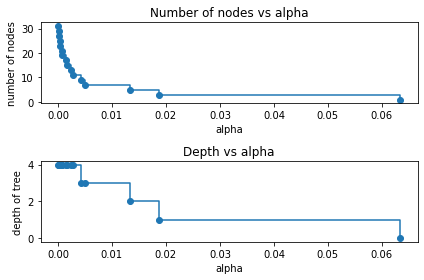

In [49]:
#clfs = clfs[:-1]
#cp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

fig, ax = plt.subplots(2,1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Here above we show that the number of nodes and tree depth decreases as alpha increases

In [58]:
y_preds = [clf.predict(x_test) for clf in clfs]
reports = [metrics.classification_report(y_test, y_pred, output_dict=True,zero_division=1) for y_pred in y_preds]
precisions = []
precision = [report['macro avg']['precision'] for report in reports]
precisions.append(precision)
print(precisions)

[[0.738610563842762, 0.738610563842762, 0.738610563842762, 0.738610563842762, 0.738610563842762, 0.738610563842762, 0.738610563842762, 0.738610563842762, 0.738610563842762, 0.738610563842762, 0.738610563842762, 0.7309398103260211, 0.7309398103260211, 0.7085004965243298, 0.8692253020611229, 0.8692253020611229]]


It's looks like pruning the tree depth doesn't improve the model. The problem might be the imbalanced dataset we are facing, to handle it, we could look for upsampling method.

### Using an upSampling method, with SMOTEEN 

In [81]:
len(x),len(y)

(7032, 7032)

In [74]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)
len(X_resampled),len(y_resampled)

(5868, 5868)

In [60]:
xr_train, xr_test, yr_train, yr_test = train_test_split(X_resampled,y_resampled,test_size=0.2)

In [62]:
model_dt_smote = DecisionTreeClassifier(criterion = "gini", random_state=100, max_depth=4, min_samples_leaf=8)

In [63]:
model_dt_smote.fit(xr_train, yr_train)
yr_predict = model_dt_smote.predict(xr_test)

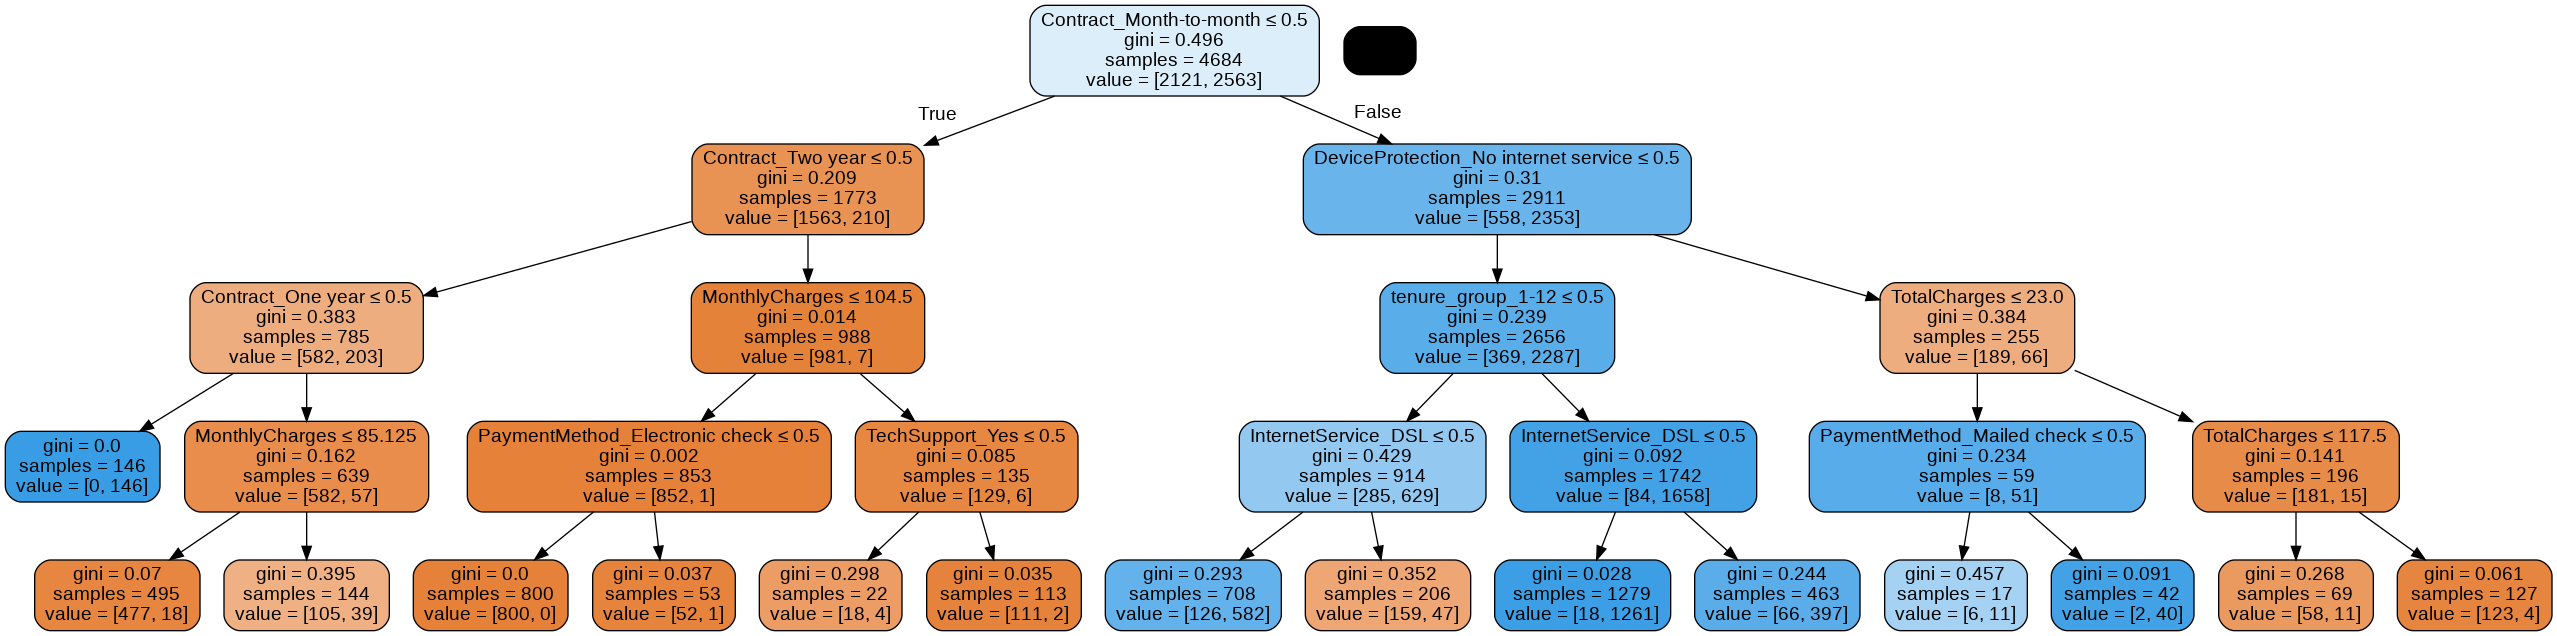

In [64]:
feature_cols = x.columns
dot_data = StringIO()
export_graphviz(model_dt_smote, out_file = dot_data,
                filled=True,rounded=True,
                special_characters=True, feature_names=feature_cols)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [66]:
feat_importance_smote = model_dt_smote.tree_.compute_feature_importances(normalize=False)
feat_imp_dict_smote = dict(zip(feature_cols, model_dt_smote.feature_importances_))
feat_imp_smote = pd.DataFrame.from_dict(feat_imp_dict_smote,orient='index')
feat_imp_smote.rename(columns={0:'FeatureImportance'},inplace=True)
feat_imp_smote.sort_values(by=['FeatureImportance'],ascending=False).head(12)

,FeatureImportance
Contract_Month-to-month,0.598999
Contract_One year,0.112612
DeviceProtection_No internet service,0.096390
InternetService_DSL,0.070694
tenure_group_1-12,0.047577
TotalCharges,0.032990
Contract_Two year,0.031608
MonthlyCharges,0.007254
PaymentMethod_Mailed check,0.001289
TechSupport_Yes,0.000567


In [68]:
report_smote = metrics.classification_report(yr_test,yr_predict, output_dict=True,zero_division=1)
precision_smote = report_smote['macro avg']['precision']
recall_smote = report_smote['macro avg']['recall']
print('precision : {}'.format(precision_smote))
print('recall : {}'.format(recall_smote))

precision : 0.9383591198593193
recall : 0.9359048962558044


In [70]:
print(metrics.confusion_matrix(yr_test,yr_predict))

[[486  44]
 [ 29 613]]


Adding Upsampling into the model, precision (quality measure) and recall (quantitative measure) are much better compared to standard model.

# Random Forest Classifier

As I done it for DecisionTree, I could try to optimize the depth and others parameters, but we have seen that improving the model is about upsampling the training data. 

In [91]:
model_rf = RandomForestClassifier(n_estimators=100, criterion='gini',random_state=100, max_depth=6, min_samples_leaf=8)

In [92]:
model_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [94]:
y_pred_rf=model_rf.predict(x_test)

In [95]:
report_rf = metrics.classification_report(y_test,y_pred_rf, output_dict=True,zero_division=1)
precision_rf = report_rf['macro avg']['precision']
recall_rf = report_rf['macro avg']['recall']
print('precision : {}'.format(precision_rf))
print('recall : {}'.format(recall_rf))

precision : 0.7578069591396605
recall : 0.6863374586768214


In [101]:
print(metrics.confusion_matrix(y_test,y_pred))

[[966  73]
 [205 163]]


The insights give by the standard Decision tree are the same here above, precision is too low as recall is.
Let's look how upsampling could help

In [96]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x,y)

In [97]:
xr_train1, xr_test1, yr_train1, yr_test1 = train_test_split(X_resampled1,y_resampled1,test_size=0.2)

In [98]:
model_rf_smote = RandomForestClassifier(n_estimators=100, criterion='gini',random_state=100, max_depth=6, min_samples_leaf=8)

In [99]:
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [103]:
yr_predict1 = model_rf_smote.predict(xr_test1)
report_rf_smote = classification_report(yr_test1,yr_predict1,output_dict=True,zero_division=1)
precision_rf_smote = report_rf_smote['macro avg']['precision']
recall_rf_smote = report_rf_smote['macro avg']['recall']
print('precision : {}'.format(precision_rf_smote))
print('recall : {}'.format(recall_rf_smote))

precision : 0.947253601099755
recall : 0.9422733666678487


Using RF Classifier, we are able to match DT classifier, even roughly better looking at the precision.

# Lasso, for dimension reduction

# XGboosting 

## PCA

In [ ]:
pca = PCA(0.9)
xr_train_pca = pca.fit_transform(xr_train1)
xr_test_pca = pca.transform(xr_test1)
explained_variance = pca.explained_variance_ratio_

In [ ]:
model = RandomForestClassifier(n_estimators=100, criterion='gini',random_state=100, max_depth=6, min_samples_leaf=8)
model.fit(xr_train_pca,yr_train1)

In [ ]:
yr_predict_pca = model.predict(xr_test_pca)
print(classification_report(yr_test1,yr_predict_pca,labels=[0,1]))
print(metrics.confusion_matrix(yr_test1,yr_predict_pca))

juste une note random que j'ai pas mentionné: pour les datasets super unbalanced, les modèles de boosting (xgboost, lightbgm) sont toujours les plus adaptés. Le boosting ça permet de mieux détecter des anomalies et évènement rares dans les données. Inconvénient, ça souffre pas mal du bruit (alors qu'un Random Forest sera justement bon sur des données bruités, mais va galérer sur un dataset super unbalanced)

## Pickling the model

In [ ]:
import pickle

In [ ]:
filename = 'model.sav'

In [ ]:
pickle.dump(model_rf_smote, open(filename,'wb'))

In [ ]:
load_model = pickle.load(open(filename,'rb'))

In [ ]:
model_score_r1 = load_model.score(xr_test1, yr_test1)
print(model_score_r1)